<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/Machine_Learning_Base_Concepts_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные концепции Machine Learning. Домашняя работа

In [40]:
### Тут нужно сделать импорты всех необходимых библиотек ###

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
### Здесь требуется загрузить датасет phones.csv ###
phones = pd.read_csv('drive/MyDrive/1.8_phones.csv')
phones.head(15)
#phones.min()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


Text(0.5, 0, 'price')

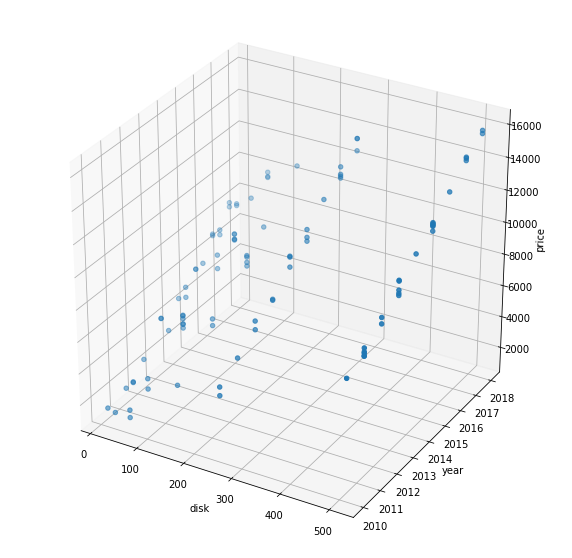

In [ ]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter(phones["disk"], phones["year"], phones["price"])

ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")

In [ ]:
from sklearn.linear_model import LinearRegression

Задание 1: обучить модель регрессии

In [ ]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["disk", "year"]]
y = phones["price"]

In [ ]:
### Здесь следует запустить процесс обучения ###
reg = LinearRegression().fit(X, y)

### и продемонстрировать работоспобность обученной модели ###


In [ ]:
# Коэффициенты множетели:
reg.coef_

array([  13.57877662, 1021.27616528])

In [ ]:
# Свободный коэффициент:
reg.intercept_

-2051913.7442219164

In [ ]:
# Предсказываем цену первого телефона в таблице - 0	64	Android	7256	2016

reg.predict(X[0:1])[0]

7848.046694419114

In [ ]:
# Предсказываем цену телефона в таблице с индексом 3 - 3	512	iOS	15045	2017

reg.predict(X[3:4])[0]

14952.614783923607

Задание 2: обучить модель классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["year", "price"]]
y = phones["os"]

In [ ]:
### Здесь следует запустить процесс обучения ###
cl = DecisionTreeClassifier().fit(X, y)

### и продемонстрировать работоспобность обученной модели ###

In [ ]:
print(export_text(cl))

|--- feature_1 <= 7660.50
|   |--- feature_0 <= 2012.50
|   |   |--- feature_1 <= 3855.50
|   |   |   |--- class: Android
|   |   |--- feature_1 >  3855.50
|   |   |   |--- class: iOS
|   |--- feature_0 >  2012.50
|   |   |--- class: Android
|--- feature_1 >  7660.50
|   |--- feature_0 <= 2015.50
|   |   |--- class: iOS
|   |--- feature_0 >  2015.50
|   |   |--- feature_1 <= 11017.00
|   |   |   |--- class: Android
|   |   |--- feature_1 >  11017.00
|   |   |   |--- class: iOS



In [ ]:
# Проверка
cl.predict(X[0:1])[0], y[0]

('Android', 'Android')

In [ ]:
cl.predict(X[3:4])[0], y[3]

('iOS', 'iOS')

Задание 3: обучить модель кластеризации

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["price", "disk"]]

In [ ]:
### Здесь следует запустить процесс обучения ###
clust = KMeans(n_clusters=2).fit(X)

### и продемонстрировать работоспобность обученной модели ###

In [ ]:
[c1, c2] = clust.cluster_centers_

In [ ]:
clust.cluster_centers_

array([[11601.65      ,   368.        ],
       [ 5784.78333333,   116.8       ]])

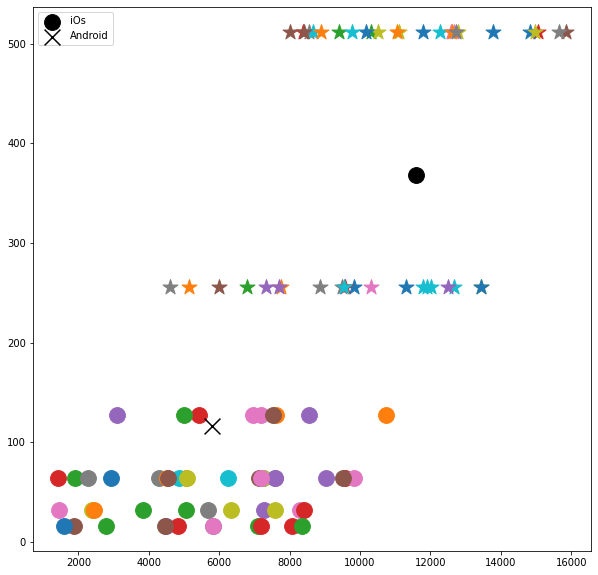

In [43]:
fig = plt.figure(figsize=(10, 10))

markers = {"Android": "o", "iOS": "*"}
for d1, d2, l in zip(phones.price, phones.disk, phones.os):
  plt.scatter(d1, d2, s=250, marker=markers[l])

plt.scatter(c1[0], c1[1], s=250, marker="o", c="black", label='iOs')
plt.scatter(c2[0], c2[1], s=250, marker="x", c="black", label='Android')

plt.legend()

# plt.ylabel("Price")
# plt.ylabel("Disk")

plt.show()